In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import urllib.request, json
import os
import tensorflow as tf 

2024-02-07 23:18:04.050095: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-07 23:18:04.491784: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-07 23:18:04.494451: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-07 23:18:06.626065: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [60]:
data = pd.read_csv('data/GOOG.csv').set_index('Date')
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-02-04,28.343512,28.767174,28.319103,28.347746,28.347746,112897588
2014-02-05,28.477758,28.661818,28.095192,28.473274,28.473274,96139007
2014-02-06,28.670786,28.895693,28.581619,28.890711,28.890711,78155853
2014-02-07,29.081743,29.337536,28.905655,29.326078,29.326078,105843245
2014-02-10,29.185604,29.449615,29.116365,29.213751,29.213751,78099643


In [61]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-29,153.639999,155.199997,152.919998,154.839996,154.839996,20909300
2024-01-30,154.009995,155.039993,152.774994,153.050003,153.050003,26578900
2024-01-31,145.389999,145.589996,141.550003,141.800003,141.800003,43908600
2024-02-01,143.690002,144.619995,142.259995,142.710007,142.710007,25526900
2024-02-02,140.889999,143.880005,138.169998,143.539993,143.539993,42116900


In [62]:
data['Log_Returns'] = np.log(data['Close']/ data['Close'].shift(1))
data['Volatility_25'] = data['Log_Returns'].rolling(window = 25).std()
data = data.dropna()

In [63]:
returns = data['Log_Returns']
volatility = data['Volatility_25']

In [64]:
volatility.shape

(2492,)

In [65]:
returns.shape

(2492,)

In [66]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,Log_Returns,Volatility_25
Date,,,,,,,,
2014-03-12,29.798309,30.083490,29.494200,30.069792,30.069792,78866507,0.006073,0.007231
2014-03-13,30.085979,30.149492,29.508394,29.615494,29.615494,94175675,-0.015223,0.008022
2014-03-14,29.439404,29.660576,29.203787,29.210512,29.210512,92099924,-0.013769,0.008112
2014-03-17,29.371161,29.814997,29.342766,29.691210,29.691210,86808163,0.016322,0.008217
2014-03-18,29.755220,30.175146,29.715120,30.168421,30.168421,72872123,0.015945,0.008720


array([<AxesSubplot: xlabel='Date'>], dtype=object)

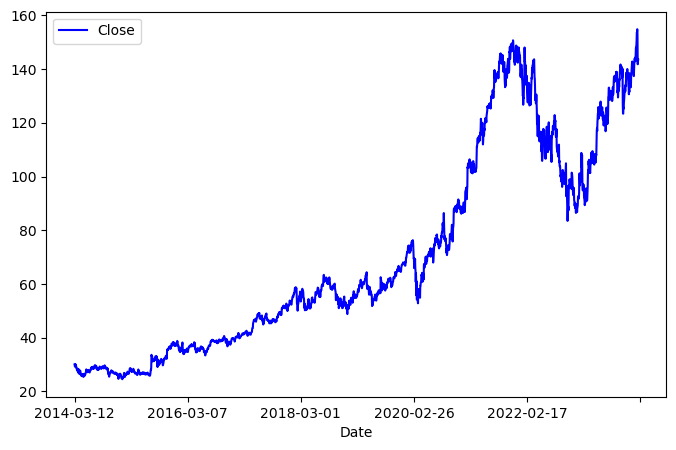

In [67]:
data[['Close']].plot(subplots= True, color = "blue",figsize=(8,5))

array([<AxesSubplot: xlabel='Date'>], dtype=object)

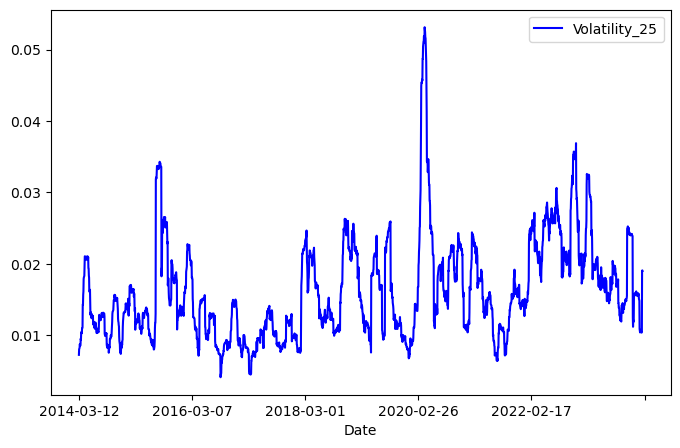

In [68]:
data[['Volatility_25']].plot(subplots=True, color="blue",figsize=(8,5))

array([<AxesSubplot: xlabel='Date'>], dtype=object)

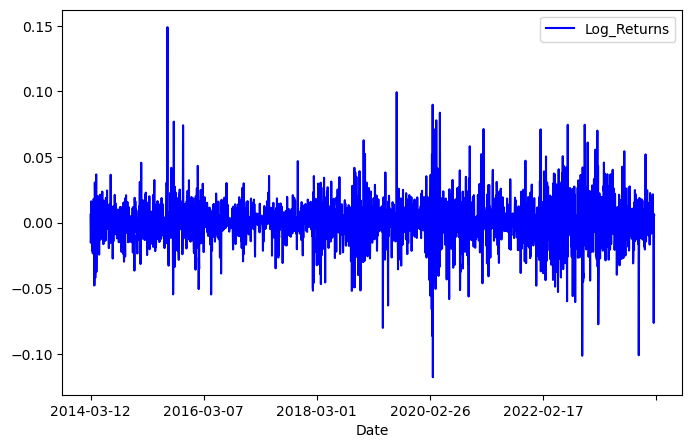

In [69]:
data[['Log_Returns']].plot(subplots=True, color = "blue", figsize = (8,5))

In [70]:
# add new columns
data['EMA_5day'] = data.iloc[:,7].ewm(span=5,adjust=False).mean()
data['EMA_20day'] = data.iloc[:,7].ewm(span=20,adjust=False).mean()
data['EMA_60day'] = data.iloc[:,7].ewm(span=60,adjust=False).mean()

In [71]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,Log_Returns,Volatility_25,EMA_5day,EMA_20day,EMA_60day
Date,,,,,,,,,,,
2014-03-12,29.798309,30.083490,29.494200,30.069792,30.069792,78866507,0.006073,0.007231,0.007231,0.007231,0.007231
2014-03-13,30.085979,30.149492,29.508394,29.615494,29.615494,94175675,-0.015223,0.008022,0.007495,0.007306,0.007257
2014-03-14,29.439404,29.660576,29.203787,29.210512,29.210512,92099924,-0.013769,0.008112,0.007700,0.007383,0.007285
2014-03-17,29.371161,29.814997,29.342766,29.691210,29.691210,86808163,0.016322,0.008217,0.007873,0.007463,0.007316
2014-03-18,29.755220,30.175146,29.715120,30.168421,30.168421,72872123,0.015945,0.008720,0.008155,0.007582,0.007362


In [72]:
volatility =data['Volatility_25']
df = data.drop('Volatility_25',axis= 1)
df.head()

,Open,High,Low,Close,Adj Close,Volume,Log_Returns,EMA_5day,EMA_20day,EMA_60day
Date,,,,,,,,,,
2014-03-12,29.798309,30.083490,29.494200,30.069792,30.069792,78866507,0.006073,0.007231,0.007231,0.007231
2014-03-13,30.085979,30.149492,29.508394,29.615494,29.615494,94175675,-0.015223,0.007495,0.007306,0.007257
2014-03-14,29.439404,29.660576,29.203787,29.210512,29.210512,92099924,-0.013769,0.007700,0.007383,0.007285
2014-03-17,29.371161,29.814997,29.342766,29.691210,29.691210,86808163,0.016322,0.007873,0.007463,0.007316
2014-03-18,29.755220,30.175146,29.715120,30.168421,30.168421,72872123,0.015945,0.008155,0.007582,0.007362


In [76]:
# lag features
df['Lag_Volatility1'] = data['Volatility_25'].shift(1)
df['Lag_Volatility5'] = data['Volatility_25'].shift(5)
df["Lag_Volatility1"] = df["Lag_Volatility1"].dropna()
df["Lag_Volatility5"] = df["Lag_Volatility5"].dropna()
# df.drop("Lag Volatility", axis = 1, inplace = True)
df = df.dropna()
df.head()


/tmp/ipykernel_300526/696604711.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Lag_Volatility1'] = data['Volatility_25'].shift(1)
/tmp/ipykernel_300526/696604711.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Lag_Volatility5'] = data['Volatility_25'].shift(5)
/tmp/ipykernel_300526/696604711.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

,Open,High,Low,Close,Adj Close,Volume,Log_Returns,EMA_5day,EMA_20day,EMA_60day,Lag_Volatility1,Lag_Volatility5
Date,,,,,,,,,,,,
2014-03-19,30.181871,30.186604,29.748743,29.869293,29.869293,64757822,-0.009965,0.008283,0.007673,0.007400,0.008720,0.007231
2014-03-20,29.886726,30.127325,29.772406,29.817238,29.817238,67640587,-0.001744,0.008363,0.007754,0.007437,0.008539,0.008022
2014-03-21,30.045134,30.127825,29.450861,29.465555,29.465555,128821050,-0.011865,0.008428,0.007831,0.007474,0.008524,0.008112
2014-03-24,29.494200,29.511883,28.541767,28.840151,28.840151,121939352,-0.021453,0.008782,0.007989,0.007540,0.008556,0.008217
2014-03-25,29.041147,29.136787,28.567921,28.859825,28.859825,96769361,0.000682,0.008971,0.008118,0.007599,0.009490,0.008720


In [77]:
train, test = volatility[:-500], volatility[-500:]
train.head()

Date
2014-03-12    0.007231
2014-03-13    0.008022
2014-03-14    0.008112
2014-03-17    0.008217
2014-03-18    0.008720
Name: Volatility_25, dtype: float64

In [78]:
from arch import  arch_model


In [79]:
model = arch_model(train, mean = "zero", vol='ARCH', p = 25)

In [80]:
res = model.fit()
res.summary()

/home/korisnik/.local/lib/python3.11/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 4.654e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      1,   Func. Count:     28,   Neg. LLF: -5617.184802396482
Iteration:      2,   Func. Count:     55,   Neg. LLF: -3893.5860275500827
Iteration:      3,   Func. Count:     87,   Neg. LLF: -3458.983336828363
Iteration:      4,   Func. Count:    117,   Neg. LLF: -5710.495869238788
Iteration:      5,   Func. Count:    144,   Neg. LLF: -4114.554332621842
Iteration:      6,   Func. Count:    181,   Neg. LLF: -3782.4575289105014
Iteration:      7,   Func. Count:    212,   Neg. LLF: -5710.428364822248
Iteration:      8,   Func. Count:    240,   Neg. LLF: -5692.280309912248
Iteration:      9,   Func. Count:    270,   Neg. LLF: -3478.345342731677
Iteration:     10,   Func. Count:    301,   Neg. LLF: -3893.5860275500827
Iteration:     11,   Func. Count:    332,   Neg. LLF: 1008348061.9951664
Iteration:     12,   Func. Count:    361,   Neg. LLF: -3967.6180613332804
Iteration:     13,   Func. Count:    392,   Neg. LLF: -5234.949463243868
Iteration:     14,   Func. Count:    423,   Neg

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Zero Mean - ARCH Model Results                        
==============================================================================
Dep. Variable:          Volatility_25   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                       ARCH   Log-Likelihood:                5710.70
Distribution:                  Normal   AIC:                          -11369.4
Method:            Maximum Likelihood   BIC:                          -11223.9
                                        No. Observations:                 1992
Date:                Wed, Feb 07 2024   Df Residuals:                     1992
Time:                        23:52:52   Df Model:                            0
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      2.7995e-06  5.763e-12  4.858e+05      0.000  [2.800e-06,2.800e-06]
alpha[1]       0.9848  3.198e-02     30.800 2.623e-208      [  0.922,  1.048]
alpha[2]   1.7084e-03  3.459e-02  4.938e-02      0.961 [-6.609e-02,6.951e-02]
alpha[3]   1.4885e-03  3.894e-02  3.823e-02      0.970 [-7.483e-02,7.781e-02]
alpha[4]   1.3081e-03  4.825e-02  2.711e-02      0.978 [-9.325e-02,9.587e-02]
alpha[5]   1.0522e-03  4.204e-02  2.503e-02      0.980 [-8.134e-02,8.345e-02]
alpha[6]   8.2415e-04  3.080e-02  2.676e-02      0.979 [-5.954e-02,6.119e-02]
alpha[7]   6.1649e-04  2.169e-02  2.842e-02      0.977 [-4.190e-02,4.313e-02]
alpha[8]   4.4523e-04  2.335e-02  1.907e-02      0.985 [-4.532e-02,4.621e-02]
alpha[9]   1.5938e-04  2.850e-02  5.592e-03      0.996 [-5.571e-02,5.603e-02]
alpha[10]  1.9096e-08  4.042e-02  4.724e-07      1.000 [-7.923e-02,7.923e-02]
alpha[11]  1.3289e-08  5.063e-02  2.625e-07      1.000 [-9.924e-02,9.924e-02]
alpha[12]  1.3898e-08  3.150e-02  4.412e-07      1.000 [-6.173e-02,6.173e-02]
alpha[13]  1.3225e-08  9.874e-02  1.339e-07      1.000      [ -0.194,  0.194]
alpha[14]  1.7219e-09  9.844e-02  1.749e-08      1.000      [ -0.193,  0.193]
alpha[15]  2.0405e-09  2.313e-02  8.822e-08      1.000 [-4.533e-02,4.533e-02]
alpha[16]  4.3150e-09  3.942e-02  1.095e-07      1.000 [-7.726e-02,7.726e-02]
alpha[17]  1.0037e-09  3.695e-02  2.717e-08      1.000 [-7.242e-02,7.242e-02]
alpha[18]  1.5611e-09  2.786e-02  5.603e-08      1.000 [-5.461e-02,5.461e-02]
alpha[19]  4.8327e-09  2.725e-02  1.773e-07      1.000 [-5.342e-02,5.342e-02]
alpha[20]  1.7685e-09  3.825e-02  4.624e-08      1.000 [-7.497e-02,7.497e-02]
alpha[21]  4.8165e-09  3.718e-02  1.295e-07      1.000 [-7.287e-02,7.287e-02]
alpha[22]  6.5100e-05  2.915e-02  2.233e-03      0.998 [-5.707e-02,5.720e-02]
alpha[23]  1.3898e-05  3.366e-02  4.129e-04      1.000 [-6.596e-02,6.599e-02]
alpha[24]  4.7132e-04  3.171e-02  1.487e-02      0.988 [-6.167e-02,6.261e-02]
alpha[25]  1.9913e-09  2.716e-02  7.330e-08      1.000 [-5.324e-02,5.324e-02]
=============================================================================

Covariance estimator: robust
"""

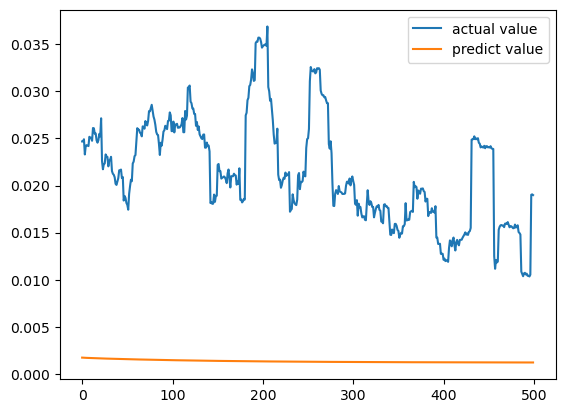

In [83]:
# forecast the test set
yhat = res.forecast(horizon=500)
# plot the actual variance

plt.plot(test.values, label='actual value')
# plot forecast variance
plt.plot(yhat.variance.values[-1, :]*3, label='predict value')
plt.legend()
plt.show()